<a href="https://colab.research.google.com/github/claubermartins/detector-de-mascaras-com-python/blob/master/detector_de_mascaras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-Importando Biliotecas

In [31]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

#2-Método de importação de arquivos do Google Colab

In [2]:
from google.colab import files
upload = files.upload()
print("downloaded files: ")
print(*upload, sep = "\n")

Saving pessoas.jpeg to pessoas.jpeg
downloaded files: 
pessoas.jpeg


#3-Importando a imagem

In [3]:
#lendo a imagem com OpenCV
imagem = cv.imread("pessoas.jpeg")

In [4]:
#No OpenCV imagem é lida como um array no tipo da biblioteca
type(imagem)

numpy.ndarray

In [5]:
#mostrando a imagem
#cv.imshow("Nome da janela", imagem)

In [6]:
#Função para mostrando a imagem
def mostrar_imagem(imagem):
#covertendo o formato da imagem RGB para o BGR do OpenCV
  imagem_rgb = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
  plt.imshow(imagem_rgb)

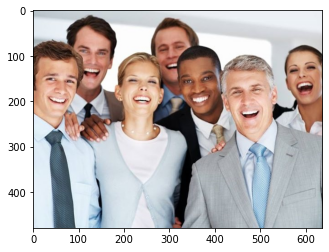

In [7]:
#mostrando a imagem
mostrar_imagem(imagem)

#4-Pré-processamento
####Neste módulo é feito um tratamento da imagem diminuindo o ruído para facilitar a detecção de um rosto na imagem e o método CascadeClassifier do algoritmo Viola-Jones para detecção de faces.

In [8]:
#covertendo a imagem para a escala de cinza
imagem_cinza = cv.cvtColor(imagem, cv.COLOR_BGR2GRAY)

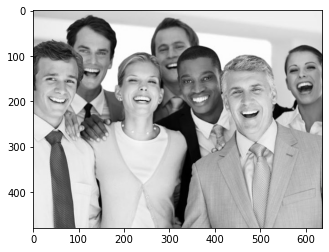

In [9]:
mostrar_imagem(imagem_cinza)

In [15]:
#Acessando arquivo para identificar faces frontais
features_haar = "haarcascade_frontalface_alt2.xml"
#features_haar = "haarcascade_frontalface_alt.xml" #bom
#features_haar = "haarcascade_frontalface_alt_tree.xml"
#features_haar = "haarcascade_frontalface_default.xml"

In [16]:
#utilizando o atributo haarcascades do OpenCV
caminho = f"{cv.haarcascades}/{features_haar}"

In [17]:
#Instanciando o modelo de classificação passando os recursos de Haar como parâmetro
classificador = cv.CascadeClassifier(caminho)

In [18]:
#Fazendo a predição utilizando o método detectMultiScale e passando a imagem na escala cinza
#resultando numa matriz de coordenadas que indica a localização dos rostos
faces = classificador.detectMultiScale(imagem_cinza)

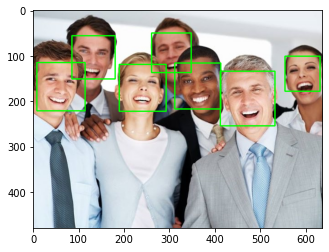

In [19]:
#Percorrendo a matriz e desenhando um retangulo em volta da face
imagem_copia = np.array(imagem)
for (x,y,w,h) in faces:
  cv.rectangle(imagem_copia, (x,y), (x+w, y+h), (0,255,0), 2)
mostrar_imagem(imagem_copia)

#5- Recortando e padronizando imagens com OpenCV
###Neste módulo vamos recortar e padronizar um conjunto de dados de faces.

In [20]:
imagens_cortadas = list()

In [21]:
#percorrendo as faces encontradas e redimensioná-las em um tamanho padrão
for (x,y,w,h) in faces:
  face = imagem[y:y+h, x:x+w]
  face = cv.resize(face, (160,160))
  imagens_cortadas.append(face)

In [22]:
#número de elementos das imagens cortadas
len(imagens_cortadas)

7

In [23]:
#verificando as dimensões
for img in imagens_cortadas:
  print(img.shape)

(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)


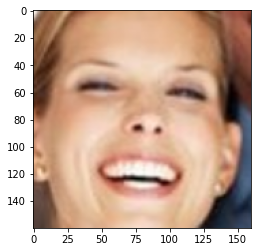

In [26]:
mostrar_imagem(imagens_cortadas[2])

In [32]:
#Salvando as imagens cortadas em um diretório para treino/teste
def salvar_imagens(imagens, caminho):
  if not os.path.exists(caminho):
    os.mkdir(caminho)
  index = len(os.listdir(caminho))

  for imagem in imagens:
    cv.imwrite(f"{caminho}/{index}.jpg",imagem)
    index += 1

In [33]:
salvar_imagens(imagens_cortadas, "/content/drive/MyDrive/detector_de_mascaras")